---

# Regresiones Lineales Multivariadas

[Ecommerce by Kaggle](https://www.kaggle.com/code/anubhavgoyal10/ecommerce-spending-5-models-r-square-0-977)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de los datos a analizar

In [2]:
clientes = pd.read_csv('Ecommerce.csv')

In [3]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Análisis de correlación

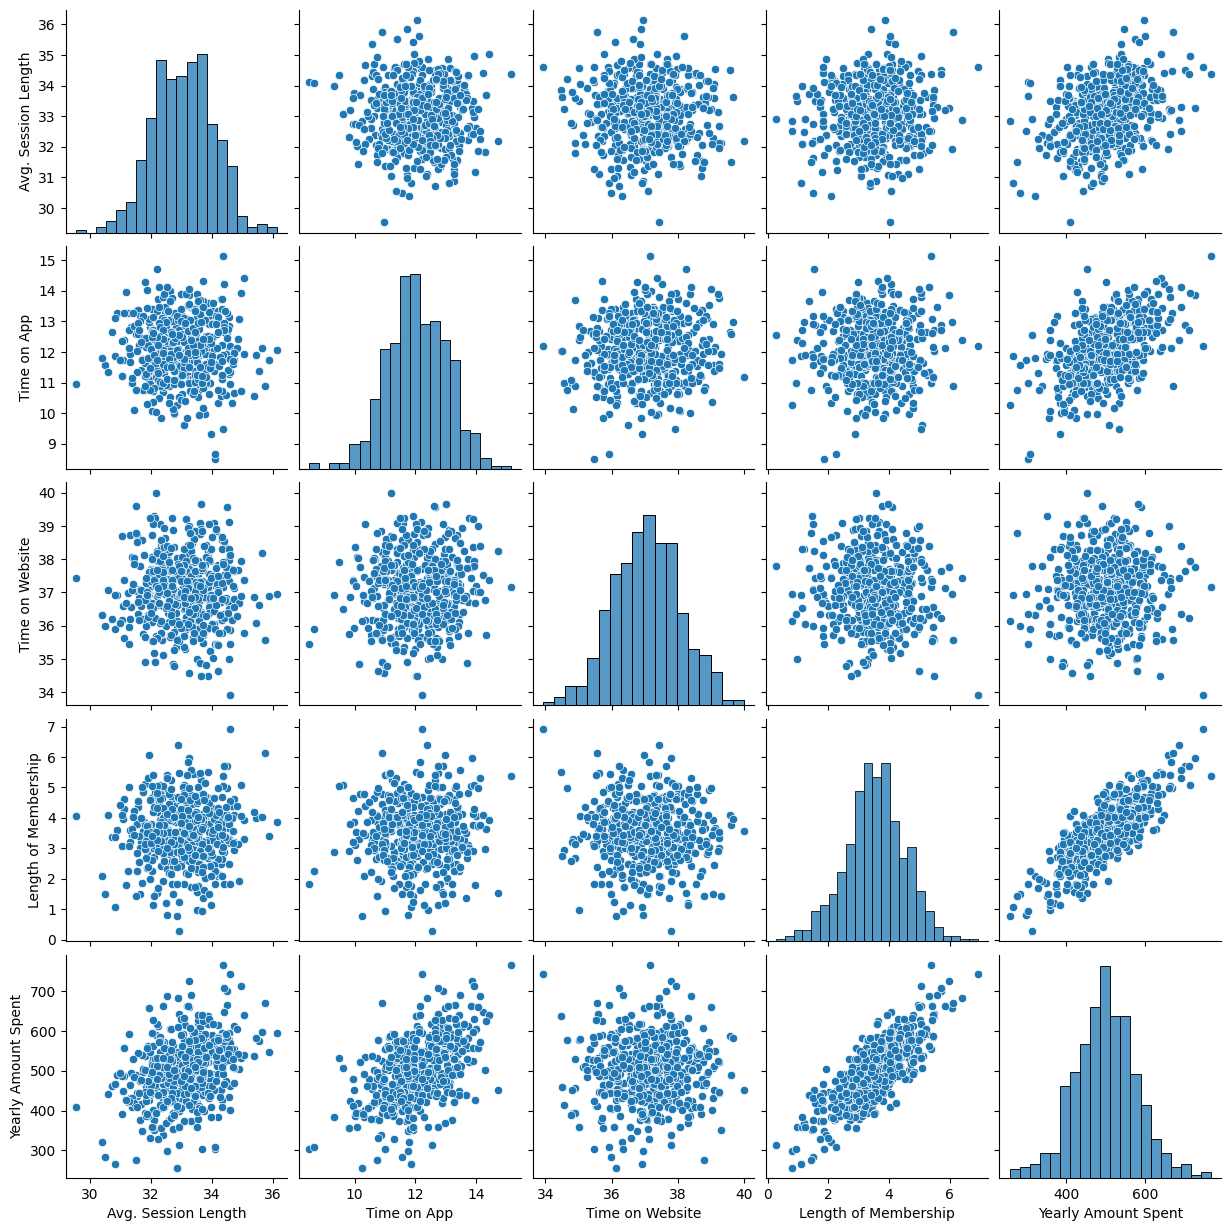

In [4]:
sns.pairplot(clientes)

In [5]:
corr = clientes.select_dtypes(include="number").corr()
corr


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

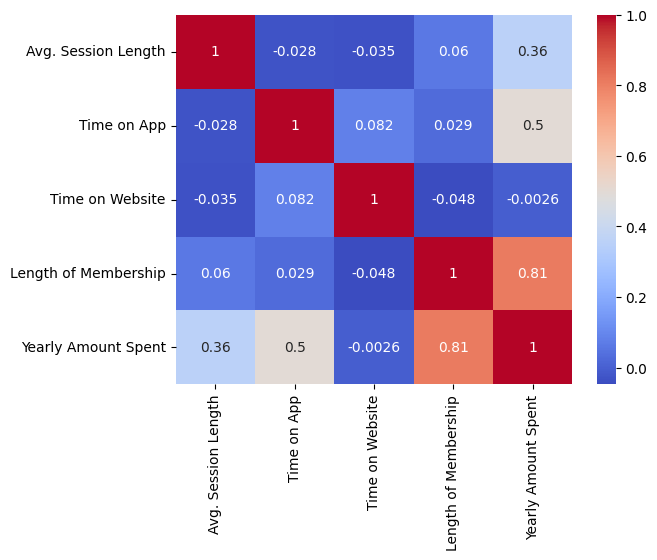

In [6]:
corr = clientes.select_dtypes(include="number").corr()

sns.heatmap(corr, cmap="coolwarm", annot=True)

### Formulación del modelo

In [7]:
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as metrics

#### 1. Modelo con una sola variable

In [8]:
lm = smf.ols(formula='Q("Yearly Amount Spent") ~ Q("Length of Membership")', data=clientes).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.655
Model:                                  OLS   Adj. R-squared:                  0.654
Method:                       Least Squares   F-statistic:                     943.9
Date:                      Fri, 06 Feb 2026   Prob (F-statistic):          4.81e-117
Time:                              20:44:10   Log-Likelihood:                -2629.9
No. Observations:                       500   AIC:                             5264.
Df Residuals:                           498   BIC:                             5272.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   272.3998      7.675     35.492      0.000     257.320     287.479
Q("Length of Membership")    64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
y_true = clientes['Yearly Amount Spent']
y_pred = lm.predict(clientes['Length of Membership'])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) )
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 37.39100548868192
MSE: 2168.4067169170785
RMSE: 46.566154199343956
R2: 0.6546162204082382
R2-Adj: 0.6539226786821504


#### 2. Modelo con todas las variables

In [11]:
lm = smf.ols(formula='''Q("Yearly Amount Spent")
                            ~ Q("Avg. Session Length") +
                              Q("Time on App") +
                              Q("Time on Website") +
                              Q("Length of Membership")''',data=clientes).fit()

In [12]:
lm.params

,0
Intercept,-1051.594255
"Q(""Avg. Session Length"")",25.734271
"Q(""Time on App"")",38.709154
"Q(""Time on Website"")",0.436739
"Q(""Length of Membership"")",61.577324


In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                     7766.
Date:                      Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                              20:44:17   Log-Likelihood:                -1856.9
No. Observations:                       500   AIC:                             3724.
Df Residuals:                           495   BIC:                             3745.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Q("Avg. Session Length")     25.7343      0.451     57.057      0.000      24.848      26.620
Q("Time on App")             38.7092      0.451     85.828      0.000      37.823      39.595
Q("Time on Website")          0.4367      0.444      0.983      0.326      -0.436       1.309
Q("Length of Membership")    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y_true = clientes['Yearly Amount Spent']
y_pred = lm.predict(clientes[['Avg. Session Length','Time on App','Time on Website','Length of Membership']])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) )
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 7.877162860953783
MSE: 98.47102522149004
RMSE: 9.923256785022247
R2: 0.9843155370226726
R2-Adj: 0.9841887938875022


Text(0, 0.5, 'Predicción Y')

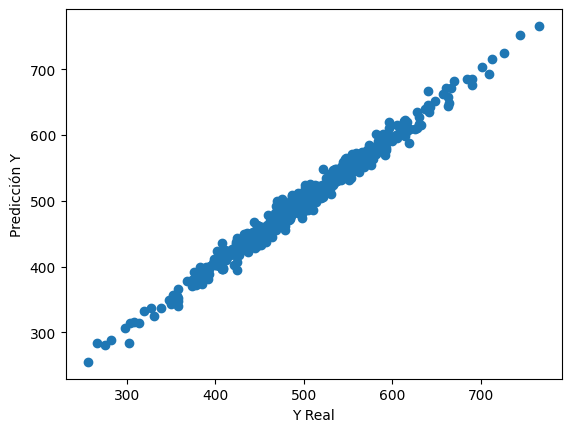

In [15]:
plt.scatter(y_true,y_pred)
plt.xlabel('Y Real')
plt.ylabel('Predicción Y')

/tmp/ipython-input-619079592.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_true-y_pred)


<Axes: ylabel='Density'>

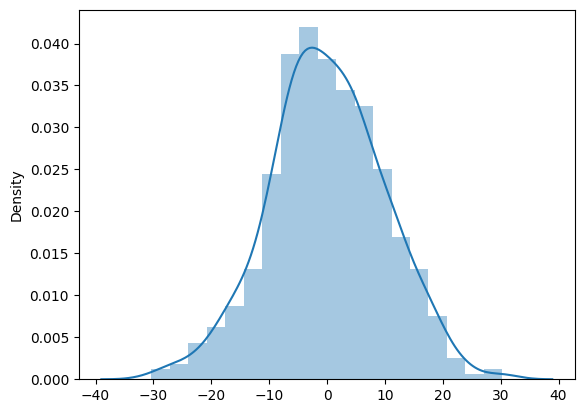

In [16]:
sns.distplot(y_true-y_pred)

### Conclusiones

- Por cada unidad que se incrementa Avg. Session Length, el gasto anual promedio se incrementa en 35.7 US
- Por cada unidad que se incrementa Time on App, el gasto anual promedio se incrementa en 38.7 US
- Por cada unidad que se incrementa Time on Website, el gasto anual promedio se incrementa en 0.4 US
- Por cada unidad que se incrementa Length of Membership, el gasto anual promedio se incrementa en 61.57 US

In [17]:
lm.params

,0
Intercept,-1051.594255
"Q(""Avg. Session Length"")",25.734271
"Q(""Time on App"")",38.709154
"Q(""Time on Website"")",0.436739
"Q(""Length of Membership"")",61.577324


¿En qué debemos invertir? ¿Aplicación web o mobile?
Eso va a depender...


## Selección del Modelo

#### 3. Modelo con eliminación en reversa de variables

In [18]:
lm = smf.ols(formula='''Q("Yearly Amount Spent") ~
                            Q("Avg. Session Length") +
                            Q("Time on App") +
                            Q("Length of Membership")''', data=clientes).fit()

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                 1.036e+04
Date:                      Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                              20:44:24   Log-Likelihood:                -1857.4
No. Observations:                       500   AIC:                             3723.
Df Residuals:                           496   BIC:                             3740.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1035.3396     15.983    -64.778      0.000   -1066.742   -1003.937
Q("Avg. Session Length")     25.7210      0.451     57.055      0.000      24.835      26.607
Q("Time on App")             38.7460      0.449     86.210      0.000      37.863      39.629
Q("Length of Membership")    61.5560      0.448    137.464      0.000      60.676      62.436
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.136
Skew:                          -0.027   Prob(JB):                        0.934
Kurtosis:                       3.060   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
y_true = clientes['Yearly Amount Spent']
y_pred = lm.predict(clientes[['Avg. Session Length','Time on App','Length of Membership']])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) )
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 7.889777736100406
MSE: 98.66342189357118
RMSE: 9.932946284641389
R2: 0.9842848920844948
R2-Adj: 0.9841898410285542


## ✅ Chequeo gráfico (simple) de 3 supuestos mínimos en MLR

A continuación validamos **tres supuestos mínimos** típicos para un modelo de **Regresión Lineal Múltiple**:

1. **Linealidad**: residuos sin patrón claro vs valores ajustados.  
2. **Homocedasticidad**: varianza de residuos relativamente constante.  
3. **No autocorrelación de residuos**: residuos no “siguen una tendencia” en el orden de observación.

> Nota: estos chequeos son **diagnósticos visuales** (introductorios). Si fallan fuerte, el modelo se vuelve poco confiable.


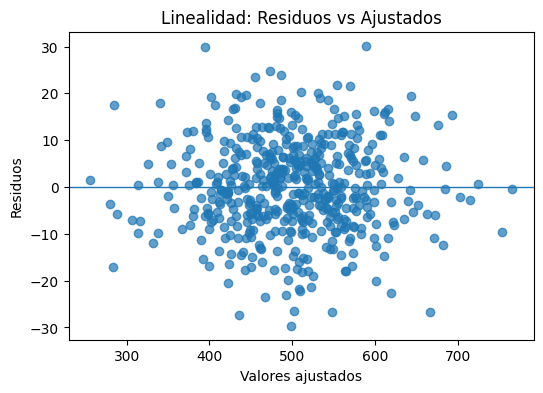

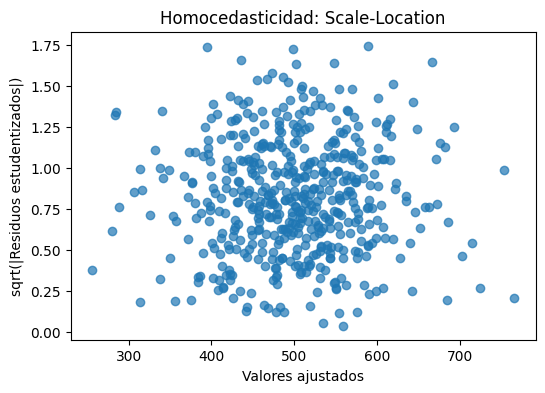

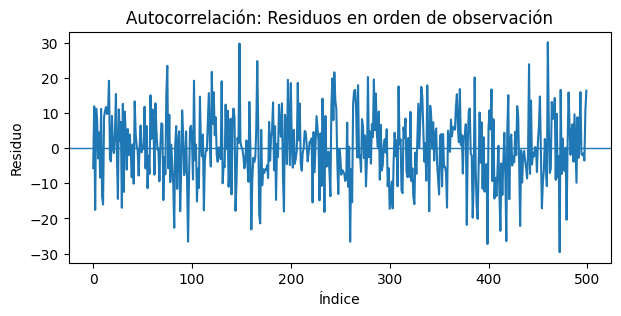

Durbin-Watson (≈2 ideal): 1.888


<Figure size 700x300 with 0 Axes>

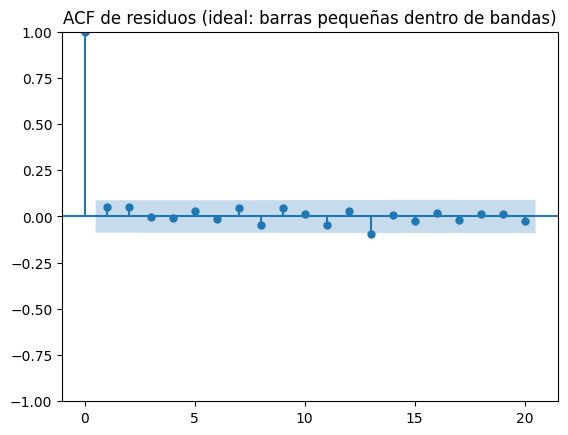

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# -------------------------------------------------------------------
# Usa el modelo seleccionado si existe, si no usa 'lm'
# -------------------------------------------------------------------
modelo = lm_sel if "lm_sel" in globals() else lm

resid  = modelo.resid
fitted = modelo.fittedvalues

# =========================
# 1) Linealidad (residuos vs ajustados)
# =========================
plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, linewidth=1)
plt.title("Linealidad: Residuos vs Ajustados")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

# =========================
# 2) Homocedasticidad (Scale-Location)
#    (usar residuos estudentizados para que sea comparable)
# =========================
infl = modelo.get_influence()
rstd = infl.resid_studentized_internal  # residuos estudentizados

plt.figure(figsize=(6,4))
plt.scatter(fitted, np.sqrt(np.abs(rstd)), alpha=0.7)
plt.title("Homocedasticidad: Scale-Location")
plt.xlabel("Valores ajustados")
plt.ylabel("sqrt(|Residuos estudentizados|)")
plt.show()

# =========================
# 3) Autocorrelación (residuos en orden + Durbin-Watson + ACF)
# =========================
plt.figure(figsize=(7,3))
plt.plot(np.asarray(resid))
plt.axhline(0, linewidth=1)
plt.title("Autocorrelación: Residuos en orden de observación")
plt.xlabel("Índice")
plt.ylabel("Residuo")
plt.show()

dw = durbin_watson(resid)
print("Durbin-Watson (≈2 ideal):", round(dw, 3))

plt.figure(figsize=(7,3))
sm.graphics.tsa.plot_acf(resid, lags=20)
plt.title("ACF de residuos (ideal: barras pequeñas dentro de bandas)")
plt.show()


## 🔎 Selección de variables (Backward) para quedarte con el “mejor” modelo

Abajo ejecutamos **Backward elimination** (partimos con todas las variables candidatas y vamos removiendo la menos significativa por **p-value** hasta que todas queden bajo `alpha`).


In [28]:
import re
import statsmodels.formula.api as smf
import patsy

alpha = 0.05 # 5% de error
target = "Yearly Amount Spent"

candidate_features = [c for c in clientes.select_dtypes(include="number").columns if c != target]

def q(col: str) -> str:
    # OJO: esto es texto para la fórmula; el Q real lo resuelve patsy.builtins.Q
    return f'patsy.builtins.Q("{col}")'

def fit_ols(features):
    if len(features) == 0:
        formula = f"{q(target)} ~ 1"
    else:
        formula = f"{q(target)} ~ " + " + ".join(q(f) for f in features)
    return smf.ols(formula=formula, data=clientes).fit()

def _term_to_col(term: str) -> str:
    # term típico: patsy.builtins.Q("Time on App")
    m = re.search(r'Q\("(.+)"\)', term)
    return m.group(1) if m else term

def backward(features, alpha=0.05):
    features = features.copy()
    model = fit_ols(features)

    while True:
        pvals = model.pvalues.drop("Intercept", errors="ignore")
        if pvals.empty:
            break

        worst_term = pvals.idxmax()
        worst_p = float(pvals.max())

        if worst_p <= alpha:
            break

        worst_feature = _term_to_col(worst_term)

        if worst_feature in features:
            features.remove(worst_feature)
        else:
            # fallback por si el nombre viene raro
            for f in features:
                if f in worst_term:
                    features.remove(f)
                    break

        if len(features) == 0:
            model = fit_ols(features)
            break

        model = fit_ols(features)

    return model, features

lm_back, feats_back = backward(candidate_features, alpha=alpha)

print("Variables seleccionadas (backward):", feats_back)
print(lm_back.summary())


Variables seleccionadas (backward): ['Avg. Session Length', 'Time on App', 'Length of Membership']
                                       OLS Regression Results                                      
Dep. Variable:     patsy.builtins.Q("Yearly Amount Spent")   R-squared:                       0.984
Model:                                                 OLS   Adj. R-squared:                  0.984
Method:                                      Least Squares   F-statistic:                 1.036e+04
Date:                                     Fri, 06 Feb 2026   Prob (F-statistic):               0.00
Time:                                             20:48:12   Log-Likelihood:                -1857.4
No. Observations:                                      500   AIC:                             3723.
Df Residuals:                                          496   BIC:                             3740.
Df Model:                                                3                                         
C